## Logistic regression
We will be using formulation used in Logistic Regression assignment from scratch.

### GOAL
- Use graadient descent to get the best separating line
- Make interactive demo

### Extra
- Use regularization

In [14]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
x = np.array([[1, 12], [1.5, 11],
              [2, 13], [2.5, 12],
              [3, 15], [3.5, 14],
              [4, 13], [4.5, 2],
              [3, 6], [1.5, 14],
              [4, 7], [2.5, 3.5],
              [5, 9], [3.5, 6],
              [6, 7], [4.5, 3]]) 
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
def sigmoid(z):
  sigmoid = 1 / (1 + np.exp(-z))
  return sigmoid

In [16]:
def get_loss_gradient(x, y_actual, y_pred, w, b, alpha):
  """
  calculate gradient with respect to w and intercept b.
  return loss, gradient value wrt w and b
  """
  if y_actual.shape != y_pred.shape:
    raise ValueError(f'y_actual{y_actual.shape} and y_pred{y_pred.shape} shape not matching')

  n = len(y_actual)

  log_loss = (-1/n)*sum([ i*np.log10(j) + ( (1-i)*np.log10(1-j) ) for i,j in zip(y_actual, y_pred)])
  l1_loss = sum([abs(weight) for weight in w])
  total_loss = log_loss+(alpha*l1_loss)

  dL_by_dw = (y_pred - y).dot(x) + (alpha/n)*( w / (np.abs(w)+1e-5) )
  dL_by_db = np.sum(y_pred - y)
  
  return total_loss, dL_by_dw, dL_by_db

In [17]:
def solve_logistic_regression(x, y, alpha=0.01, eta=0.01, tolerance=1e-3, w_start=0, b_start=0):
  '''
  takes input x, output y and learning rate eta as input.
  gradient descent update is stopped when update is less than tolerance.
  gives best m and c.
  '''

  # Intialize slope and intercept
  if x.ndim == 1:
    x = x.reshape(x.shape[0],1)
    w = np.array([w_start])
  else:
    w = np.zeros(x.shape[-1]) + w_start
  b = b_start
  errors = [np.inf]
  w_array = [w]
  b_array = [b]
  continue_loop = True
  epoch = 0

  while continue_loop:
    y_pred = sigmoid( (x.dot(w.T)) + b )

    L, dw, db = get_loss_gradient(x, y, y_pred, w, b, alpha)

    w = w - (eta*dw)
    b = b - (eta*db)

    w_array.append(w)
    b_array.append(b)
    errors.append(L)

    epoch += 1
    continue_loop = (errors[epoch-1] - errors[epoch]) > tolerance

  metadata = np.array([errors[1:], w_array[:-1], b_array[:-1]])
  return metadata.T, w, b

In [18]:
def plot_line_wb(weight, bias, x_vals, epoch, loss, color='b'):
  # global fig, ax1, ax2, ax3
  """Plot a line from weight and bias"""
  # axes = plt.gca()
  # x_vals = np.array(ax1.get_xlim())

  ########### ax2 drawing ################
  y_vals = bias + weight * x_vals

  title = f'epoch = {epoch}'
  ax2.set_title(title)

  data = f'w(slope) = {round(weight,4)}\n b(bias) = {round(bias,4)}'
  text = ax2.text(5,5,data,color='b')

  line, = ax2.plot(x_vals, y_vals,'--', color=color)
  # print(line)

  ########### ax3 drawing ################
  ax3.plot(epoch,loss,'-ro')
  ax3.set_title(f'loss: {round(loss,5)}')

  ########## Figure drawing ##############
  fig.canvas.draw()
  fig.canvas.flush_events()
  plt.pause(0.00001)
  line.remove()
  text.remove()

def simulate_linreg(x,y,metadata_lmc):
  loss, weights_array, bias_array = metadata_lmc.T
  epochs = iter(list(range(len(loss))))
  loss_iter = iter(loss)
  ax1.plot(x,y,'o')
  x_vals = np.array(ax1.get_xlim())
  # print(ax1.get_xlim())
  for w,b in zip(weights_array,bias_array):
    plot_line_wb(w[0],b, x_vals, next(epochs), next(loss_iter))
    time.sleep(0.01)

def get_figure():
  global fig, ax1, ax2, ax3
  fig = plt.figure(figsize=(12,8))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(121)
  ax3 = fig.add_subplot(122)
  ax3.set_ylim(ymin=0, ymax=2)
  ax3.set_xlim(xmin=0, xmax=100)

In [37]:
x = np.array([[1, 12], [1.5, 11],
              [2, 13], [2.5, 12],
              [3, 15], [3.5, 14],
              [4, 13], [4.5, 2],
              [3, 6], [1.5, 14],
              [4, 7], [2.5, 3.5],
              [5, 9], [3.5, 6],
              [6, 7], [4.5, 3]]) 
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

print(x.shape, y.shape)
assert x.shape[0]==y.shape[0]

metadata_lmc, coef_, intercept_ = solve_logistic_regression(x, y, w_start=1, b_start=-2, eta=1e-3 ,tolerance=1e-6)
print(f'coef_ = {coef_} \nintercept={intercept_}')
slope = -(coef_[0]/coef_[1])  # slope = -w1/w2
intercept = -(intercept_/coef_[1]) # b = -w0/w2
print(f'slope = {slope} \nintercept={intercept}')

(16, 2) (16,)
coef_ = [-0.14998013  0.28831139] 
intercept=-2.2028436613670657
slope = 0.5202018708602881 
intercept=7.640501619439249


/home/mayur/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


/home/mayur/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


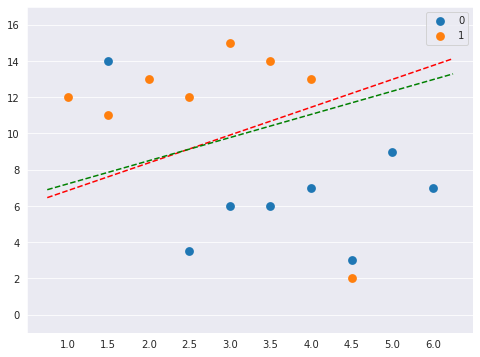

In [12]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x,y)
w1, w2 = lr_model.coef_[0,:]
w0 = lr_model.intercept_

sns.set_style('darkgrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.set_ylim(ymin=np.min(x)-2, ymax=np.max(x)+2)
sns.pointplot(x.T[0,:], x.T[1,:],hue=y, join=False, ax=ax1)
x_vals = np.array(ax1.get_xlim())
y_vals = -(w0/w2) - (w1/w2) * x_vals
plt.plot(x_vals, y_vals,'--', color='r')

y_vals_cust = intercept + slope * x_vals
plt.plot(x_vals, y_vals_cust,'--', color='g')


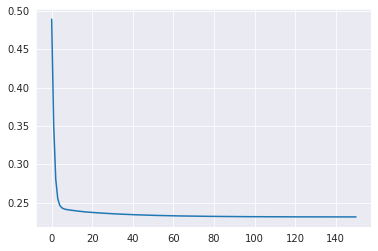

In [13]:
loss = metadata_lmc.T[0,:]
loss, weights_array, bias_array = metadata_lmc.T
epochs = list(range(len(loss)))
sns.lineplot(y=list(loss), x=epochs)
plt.show()